In [91]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [92]:
#importing three datasets
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [93]:
rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating)
rating_df.head()

C:\Users\SAMYAK\AppData\Local\Temp\ipykernel_15044\268036452.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [94]:
user_df = pd.read_csv('users.dat',header=None,delimiter='::',names=user)
user_df.head()

C:\Users\SAMYAK\AppData\Local\Temp\ipykernel_15044\1564428037.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user_df = pd.read_csv('users.dat',header=None,delimiter='::',names=user)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [95]:
movie_df = pd.read_csv('movies.dat',header=None,delimiter='::',names=movie)
movie_df.head()

C:\Users\SAMYAK\AppData\Local\Temp\ipykernel_15044\1526628691.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_df = pd.read_csv('movies.dat',header=None,delimiter='::',names=movie)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
#merging three datasets as df called as Master_data
df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movie_df,how='outer',on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


<AxesSubplot:>

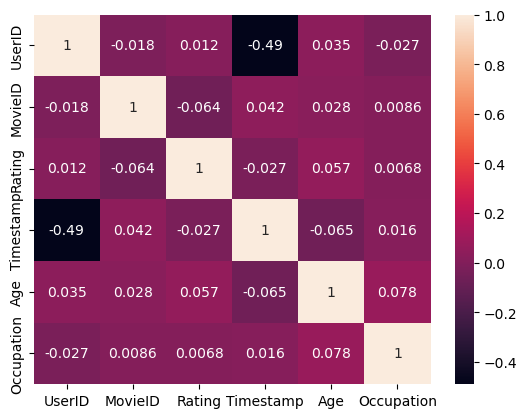

In [97]:
corr = df.corr()
sns.heatmap(corr,annot= True)

In [98]:
print('N/A values in the data frame is :')
def is_na(x):
    for i in x.columns:
        print(i,'column',' :',x[i].isna().sum(),'\n')
is_na(df)

N/A values in the data frame is :
UserID column  : 177 

MovieID column  : 0 

Rating column  : 177 

Timestamp column  : 177 

Gender column  : 177 

Age column  : 177 

Occupation column  : 177 

Zip-code column  : 177 

Title column  : 0 

Genres column  : 0 



In [99]:
df.dropna(inplace=True)

In [100]:
df.Rating.isna().value_counts()

False    1000209
Name: Rating, dtype: int64

In [101]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
df_unique(df)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 2.982e+03 3.893e+03 4.211e+03] 
 Total unique values is:  6040
Column :  MovieID 
 [1193  661  914 ... 2845 3607 2909] 
 Total unique values is:  3706
Column :  Rating 
 [5. 4. 3. 2. 1.] 
 Total unique values is:  5
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.58846401e+08
 9.76029116e+08 9.57273353e+08] 
 Total unique values is:  458455
Column :  Gender 
 ['F' 'M'] 
 Total unique values is:  2
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35.] 
 Total unique values is:  7
Column :  Occupation 
 [10. 16. 12.  7.  1.  3.  4.  8. 17.  0.  2.  9. 19. 18. 15. 11. 20. 13.
  5. 14.  6.] 
 Total unique values is:  21
Column :  Zip-code 
 ['48067' '70072' '32793' ... '74403' '79401' '77662'] 
 Total unique values is:  3439
Column :  Title 
 ["One Flew Over the Cuckoo's Nest (1975)"
 'James and the Giant Peach (1996)' 'My Fair Lady (1964)' ...
 'White Boys (1999)' 'One Little Indian (1973)'
 'Five Wives, Three Secreta

<AxesSubplot:>

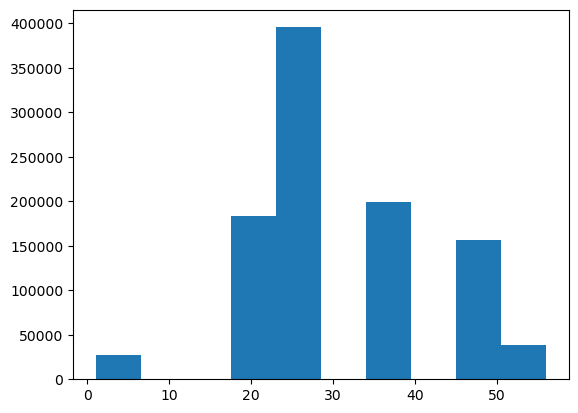

In [102]:
#Visualizing User Age Distribution
df.Age.hist(grid=False)

In [103]:
#Visualizing User rating movie “Toy Story”
def fn(x):
    return re.search("Toy Story".lower(), x.lower())!=None
title = df.iloc[0].Title
title

"One Flew Over the Cuckoo's Nest (1975)"

In [104]:
#importing reg-ex
import re
re_tit = df["Title"].apply(fn)
re_tit.head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [105]:
toystory = df[df["Title"].apply(fn)]
toystory

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022.0,3114,5.0,956755741.0,M,25.0,17.0,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024.0,3114,4.0,956749447.0,M,25.0,12.0,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027.0,3114,4.0,956726766.0,M,18.0,4.0,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036.0,3114,4.0,956710231.0,F,25.0,15.0,32603,Toy Story 2 (1999),Animation|Children's|Comedy


<AxesSubplot:>

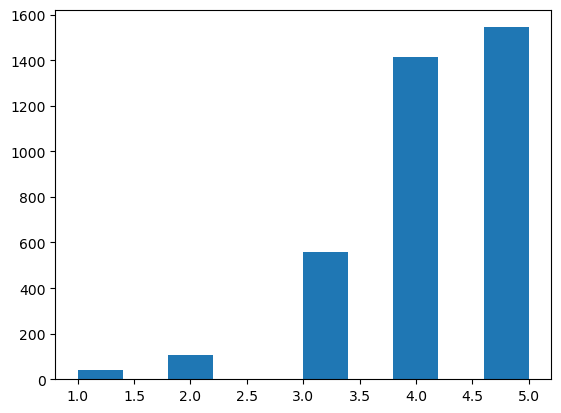

In [106]:
toystory.Rating.hist(grid=False)

In [107]:
#Top 25 movies by viewership rating
top_25 = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
top_25

MovieID  Title                                                   
2858     American Beauty (1999)                                      3428
260      Star Wars: Episode IV - A New Hope (1977)                   2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)       2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)           2883
480      Jurassic Park (1993)                                        2672
                                                                     ... 
3237     Kestrel's Eye (Falkens öga) (1998)                             1
763      Last of the High Kings, The (a.k.a. Summer Fling) (1996)       1
624      Condition Red (1995)                                           1
2563     Beauty (1998)                                                  1
3290     Soft Toilet Seats (1999)                                       1
Name: Timestamp, Length: 3706, dtype: int64

In [108]:
print('Top 25 movies by viewership rating')
print(top_25[:25])

Top 25 movies by viewership rating
MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                             

In [109]:
#ratings for all the movies reviewed by for a particular user of user id= 2696
usr_2696 = df.loc[df.UserID==2696, "Rating"].sort_values(ascending=False)
usr_2696.head(),usr_2696.shape

(250014    5.0
 609204    4.0
 612552    4.0
 244232    4.0
 689379    4.0
 Name: Rating, dtype: float64,
 (20,))

<AxesSubplot:>

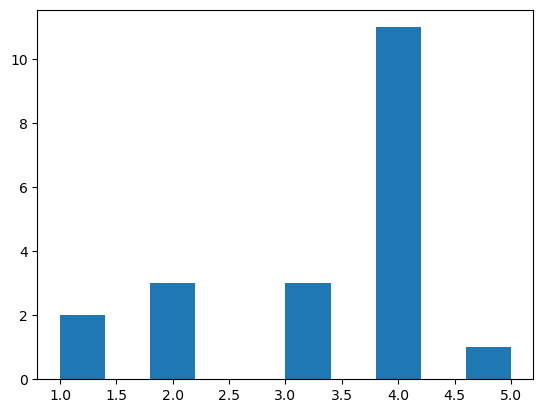

In [110]:
usr_2696.hist(grid=False)

In [111]:
df.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [112]:
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [113]:
unique_gen = list(set(genre_list))
print(unique_gen)
print("Length of the unique Genre : ",len(unique_gen))

['Animation', 'Action', 'Musical', "Children's", 'Comedy', 'Drama', 'Sci-Fi', 'Adventure', 'Documentary', 'Horror', 'War', 'Thriller', 'Crime', 'Mystery', 'Film-Noir', 'Western', 'Fantasy', 'Romance']
Length of the unique Genre :  18


In [114]:
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [115]:
new_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df_new = new_data.drop(['Title','Zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,M,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,M,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,M,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,M,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
print(df_new.columns)

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [118]:
pd.get_dummies(df_new.Gender)

,F,M
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1000204,0,1
1000205,0,1
1000206,0,1
1000207,1,0


In [119]:
x = df_new.drop(['UserID','MovieID','Rating','Gender'],axis=1)
x.shape

(1000209, 20)

In [120]:
print('The features affecting the ratings of any particular movie:')
print()
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Age', 'Occupation', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [121]:
y = df_new.Rating
y.shape

(1000209,)

In [122]:
x.Occupation.value_counts()

4.0     131032
0.0     130499
7.0     105425
1.0      85351
17.0     72816
20.0     60397
12.0     57214
2.0      50068
14.0     49109
16.0     46021
6.0      37205
3.0      31623
10.0     23290
15.0     22951
5.0      21850
11.0     20563
19.0     14904
13.0     13754
18.0     12086
9.0      11345
8.0       2706
Name: Occupation, dtype: int64

In [123]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(    Age  Occupation  Action  Adventure  Animation  Children's  Comedy  Crime  \
 0   1.0        10.0       0          0          0           0       0      0   
 1  56.0        16.0       0          0          0           0       0      0   
 2  25.0        12.0       0          0          0           0       0      0   
 3  25.0         7.0       0          0          0           0       0      0   
 4  50.0         1.0       0          0          0           0       0      0   
 
    Documentary  Drama  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0            0      1  ...                0                0                0   
 1            0      1  ...                0                0                0   
 2            0      1  ...                0                1                0   
 3            0      1  ...                0                0                0   
 4            0      1  ...                0                0                0   
 
    Occupation_14.

In [124]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

#importing LGBMClassifier 
from lightgbm import LGBMClassifier


In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 10,stratify=y)

In [126]:
lgb = LGBMClassifier(boosting_type = 'gbdt',n_jobs= -1,objective='multiclass')

In [127]:
lgb.fit(x_train,y_train)

LGBMClassifier(objective='multiclass')

In [128]:
y_pred = lgb.predict(x_test)

In [129]:
print('LGBM accuracy score is : ', accuracy_score(y_test,y_pred)*100)

LGBM accuracy score is :  36.27138300956799
